In [1]:
import pandas as pd

In [2]:
import sys
sys.path.append('../../')

from tcremp.tcremp_cluster import run_dbscan_clustering, standardize_data, apply_pca

In [3]:
def get_sample_info(sample_name):
    data_path = f'/projects/immunestatus/pogorelyy/tcrempnet/{sample_name}'
    summary = pd.read_csv(f'{data_path}/yfv_{sample_name}_summary_tcrempnet.tsv', sep='\t')
    enr_summary = summary[summary.enrichment_pvalue < 0.05]
    clonotype_info = pd.read_csv(f'{data_path}/yfv_{sample_name}_tcremp_clusters.tsv', sep='\t')
    clonotype_info = clonotype_info[clonotype_info.cluster_id.isin(enr_summary.cluster_id)]
    embeddings = pd.read_csv(f'{data_path}/yfv_{sample_name}_enriched_embeddings_tcremp.tsv', sep='\t')
    print(f'''
    sample: {sample_name}
    clusters: {len(summary)}
    overall clonotypes: {summary.cluster_size.sum()}
    overall from background: {summary.background.sum()}
    overall from sample: {summary['sample'].sum()}
    
    clusters enriched: {len(enr_summary)}
    clusters enriched clonotypes: {enr_summary.cluster_size.sum()}
    clones enriched from background: {enr_summary.background.sum()}
    clones enriched from sample: {enr_summary['sample'].sum()}
    ''')
    return enr_summary, clonotype_info, embeddings

In [ ]:
# singletons in background
# compare with tcrnet
# проверить на сгенеренном бэкграунде

In [5]:
samples = ['S1_F1', 'S2_F1', 'P1_F1', 'P2_F1', 'Q1_F1', 'Q2_F1']
sample_to_data = {}

for sample in samples:
    sample_to_data[sample] = get_sample_info(sample)


    sample: S1_F1
    clusters: 6986
    overall clonotypes: 40189
    overall from background: 19807
    overall from sample: 20382
    
    clusters enriched: 82
    clusters enriched clonotypes: 1874
    clones enriched from background: 551
    clones enriched from sample: 1323
    

    sample: S2_F1
    clusters: 12874
    overall clonotypes: 74713
    overall from background: 33860
    overall from sample: 40853
    
    clusters enriched: 228
    clusters enriched clonotypes: 9902
    clones enriched from background: 3164
    clones enriched from sample: 6738
    

    sample: P1_F1
    clusters: 10445
    overall clonotypes: 60985
    overall from background: 18740
    overall from sample: 42245
    
    clusters enriched: 22
    clusters enriched clonotypes: 445
    clones enriched from background: 32
    clones enriched from sample: 413
    

    sample: P2_F1
    clusters: 12778
    overall clonotypes: 74659
    overall from background: 25107
    overall from sample: 49552


In [33]:
data_for_plotting = {}
for sample in samples:
    embeddings = sample_to_data[sample][2]
    embeddings = embeddings[embeddings.source == 'sample'].drop(columns=['clone_id', 'cluster_id', 'source', 'enrichment_pvalue'])
    embeddings['sample'] = sample
    data_for_plotting[sample] = embeddings

In [34]:
all_info = pd.concat(data_for_plotting.values())

In [35]:
sample_labels = all_info['sample']

In [64]:
standardized = standardize_data(all_info.drop(columns=['sample']).values)
reduced = apply_pca(standardized, n_components=50)

In [27]:
all_info

,0_b_v,0_b_j,0_b_cdr3,1_b_v,1_b_j,1_b_cdr3,2_b_v,2_b_j,2_b_cdr3,3_b_v,...,2997_b_v,2997_b_j,2997_b_cdr3,2998_b_v,2998_b_j,2998_b_cdr3,2999_b_v,2999_b_j,2999_b_cdr3,sample
0,760.0,221.0,1240.0,712.0,0.0,950.0,668.0,221.0,1060.0,668.0,...,405.0,0.0,550.0,0.0,107.0,1110.0,716.0,107.0,880.0,S1_F1
1,205.0,221.0,1340.0,393.0,0.0,650.0,751.0,221.0,1080.0,751.0,...,706.0,0.0,510.0,701.0,107.0,1210.0,367.0,107.0,580.0,S1_F1
2,205.0,221.0,1320.0,393.0,0.0,650.0,751.0,221.0,900.0,751.0,...,706.0,0.0,510.0,701.0,107.0,1230.0,367.0,107.0,740.0,S1_F1
3,760.0,196.0,1380.0,712.0,107.0,990.0,668.0,196.0,1020.0,668.0,...,405.0,107.0,730.0,0.0,0.0,1210.0,716.0,0.0,800.0,S1_F1
4,776.0,205.0,1400.0,814.0,184.0,790.0,838.0,205.0,1040.0,838.0,...,809.0,184.0,790.0,820.0,183.0,1190.0,732.0,183.0,680.0,S1_F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,776.0,221.0,1550.0,814.0,0.0,780.0,838.0,221.0,1190.0,838.0,...,809.0,0.0,820.0,820.0,107.0,1240.0,732.0,107.0,590.0,Q2_F1
969,861.0,196.0,1540.0,891.0,107.0,710.0,911.0,196.0,1160.0,911.0,...,878.0,107.0,810.0,877.0,0.0,1130.0,833.0,0.0,600.0,Q2_F1
970,861.0,196.0,1510.0,891.0,107.0,780.0,911.0,196.0,1150.0,911.0,...,878.0,107.0,820.0,877.0,0.0,1140.0,833.0,0.0,470.0,Q2_F1
971,861.0,196.0,1520.0,891.0,107.0,770.0,911.0,196.0,1160.0,911.0,...,878.0,107.0,830.0,877.0,0.0,1090.0,833.0,0.0,680.0,Q2_F1


In [28]:
reduced

array([[ 4.64355293e+01, -3.37438446e+01,  1.47771347e+01, ...,
        -3.55898413e+00,  1.65593528e+00,  5.28739490e-01],
       [ 7.59218723e+01, -6.72517778e+01, -5.39989404e+01, ...,
         4.39272566e+00, -2.76644998e+00,  2.05442381e+00],
       [ 7.56524918e+01, -6.95201000e+01, -5.52419698e+01, ...,
         5.18719238e+00,  2.03178861e+00,  3.18586877e+00],
       ...,
       [-6.01944434e+01, -4.08151684e+01,  1.57236816e+01, ...,
        -2.41498973e+00, -1.88763069e+00, -2.73361667e-01],
       [-5.90051260e+01, -3.67314131e+01,  1.75378226e+01, ...,
         6.57921737e-01,  1.28608652e-01, -4.20430710e-01],
       [-5.68837666e+01, -4.08121134e+01,  1.60883209e+01, ...,
        -1.13427679e+00,  1.03485625e-02,  4.15027379e-01]])

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns

def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, s=50, palette='tab10', alpha=0.8)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.tight_layout()
    plt.show()

def visualize_embeddings(reduced, samples):
    # PCA
    reduced_pca = PCA(n_components=2).fit_transform(reduced)
    plot_embedding(reduced_pca, samples, "PCA")

    # t-SNE
    reduced_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(reduced)
    plot_embedding(reduced_tsne, samples, "t-SNE")

    # UMAP
    reduced_umap = umap.UMAP().fit_transform(reduced)
    plot_embedding(reduced_umap, samples, "UMAP")


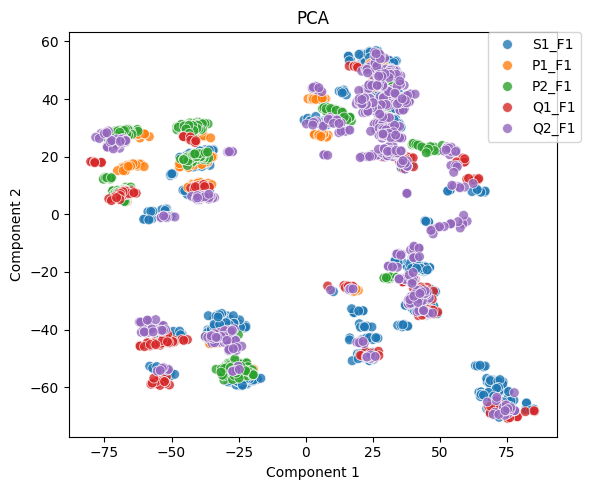

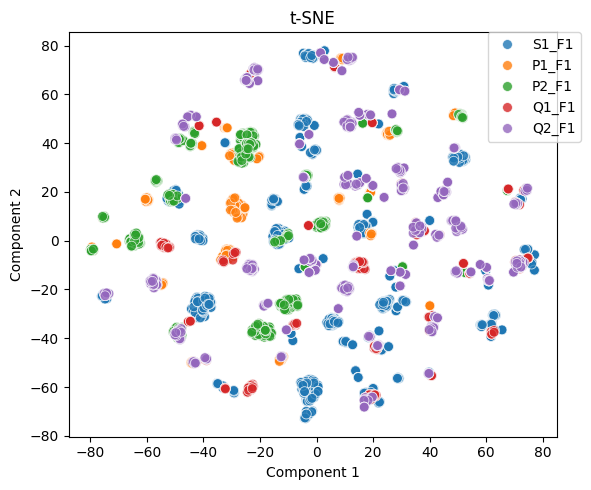

/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


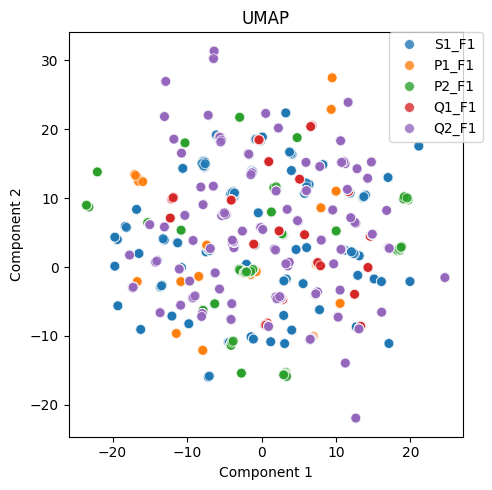

In [30]:
visualize_embeddings(reduced, sample_labels)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

def plot_umap_grid(reduced, samples, neighbors_list=[5, 15, 30], min_dist_list=[0.01, 0.1, 0.5]):
    num_rows = len(neighbors_list)
    num_cols = len(min_dist_list)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

    for i, n_neighbors in enumerate(neighbors_list):
        for j, min_dist in enumerate(min_dist_list):
            reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric='euclidean')
            embedding = reducer.fit_transform(reduced)

            ax = axes[i, j]
            sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=samples, s=30,
                            palette='tab10', alpha=0.8, ax=ax, legend=False)
            ax.set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}')
            ax.set_xticks([])
            ax.set_yticks([])

    plt.tight_layout()
    plt.show()


/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling

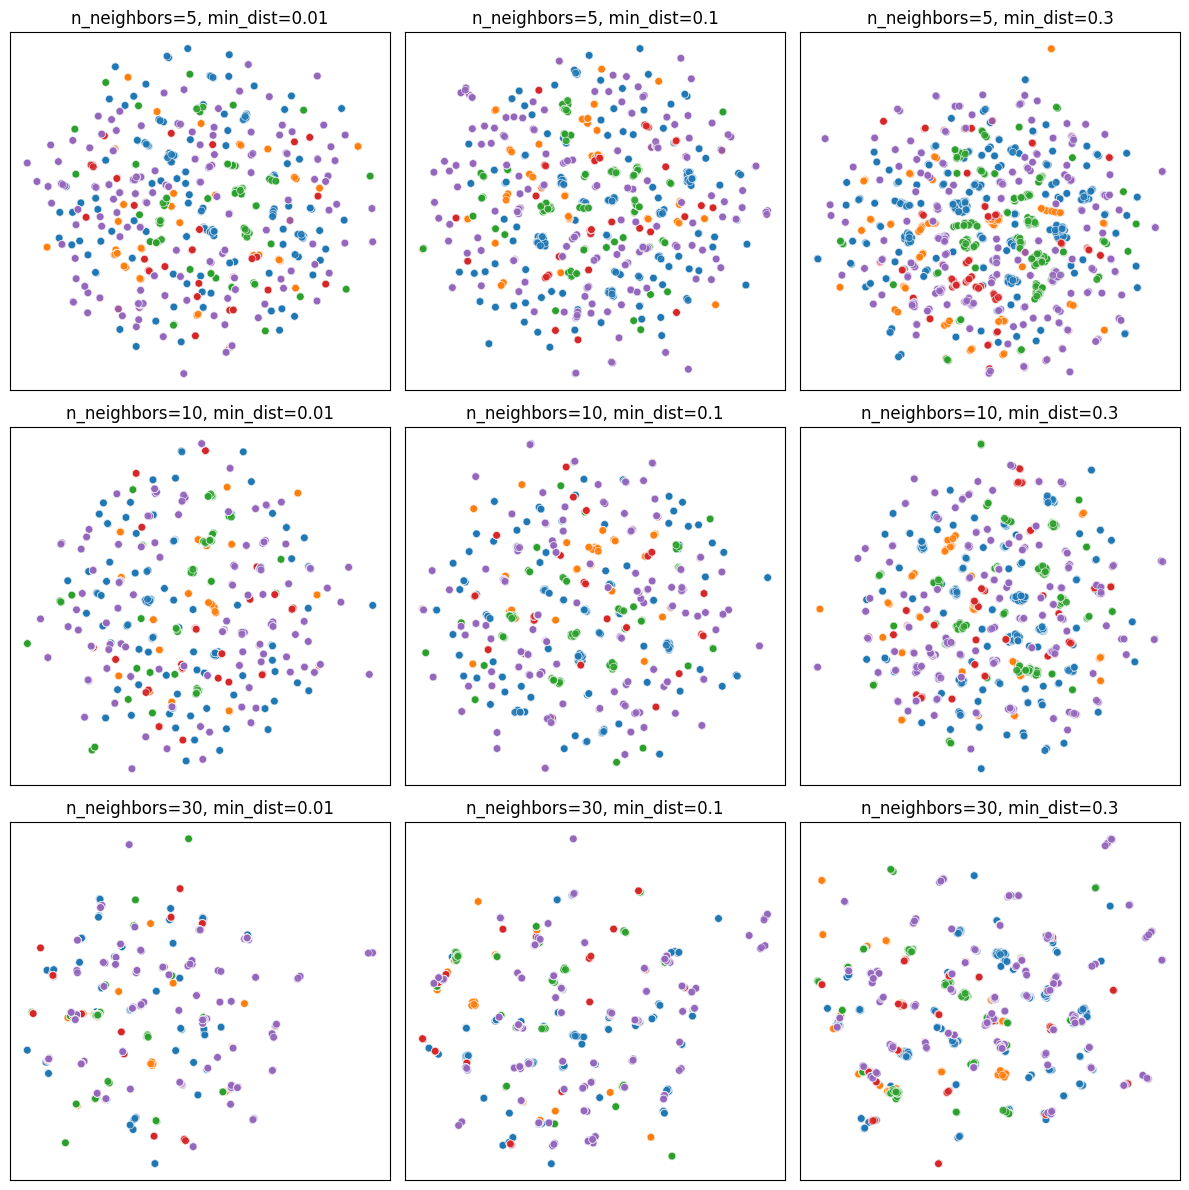

In [32]:
plot_umap_grid(reduced, sample_labels,
               neighbors_list=[5, 10, 30],
               min_dist_list=[0.01, 0.1, 0.3])


In [38]:
data_for_clust = all_info.drop(columns=['sample'])

In [59]:
import logging
logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO
    )

In [60]:
clustering = run_dbscan_clustering(data_for_clust, n_neighbors=8)

In [61]:
clustering = pd.DataFrame({'sample': sample_labels, 'cluster': clustering})

In [65]:
reduced.shape

(10543, 50)

In [66]:
from sklearn.cluster import HDBSCAN

In [70]:
res = HDBSCAN().fit_predict(reduced)

In [72]:
clustering = pd.DataFrame({'sample': sample_labels, 'cluster': res})

In [75]:
clustering.groupby('cluster').value_counts()

cluster  sample
-1       S2_F1     1532
         S1_F1      252
         P2_F1      182
         Q2_F1       93
         P1_F1       42
                   ... 
 560     S2_F1        4
         S1_F1        1
 561     S2_F1       19
         S1_F1        4
 562     S2_F1        8
Name: count, Length: 789, dtype: int64

In [78]:
pivot_table.drop(columns=[-1])

cluster,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
sample,,,,,,,,,,,,,,,,,,,,,
P1_F1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P2_F1,0,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
Q1_F1,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q2_F1,0,5,5,5,0,5,53,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S1_F1,7,0,0,0,0,0,0,6,0,0,...,3,1,1,3,1,10,2,1,4,0
S2_F1,0,0,0,0,7,0,0,0,0,5,...,4,4,8,2,7,17,5,4,19,8


Метрика: euclidean, Метод: average


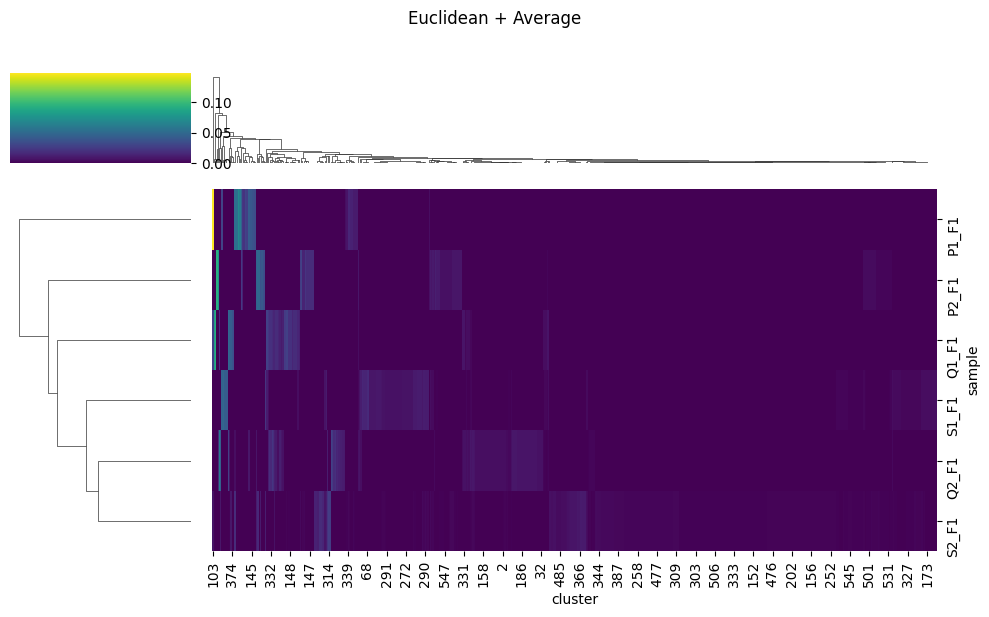

Метрика: euclidean, Метод: single


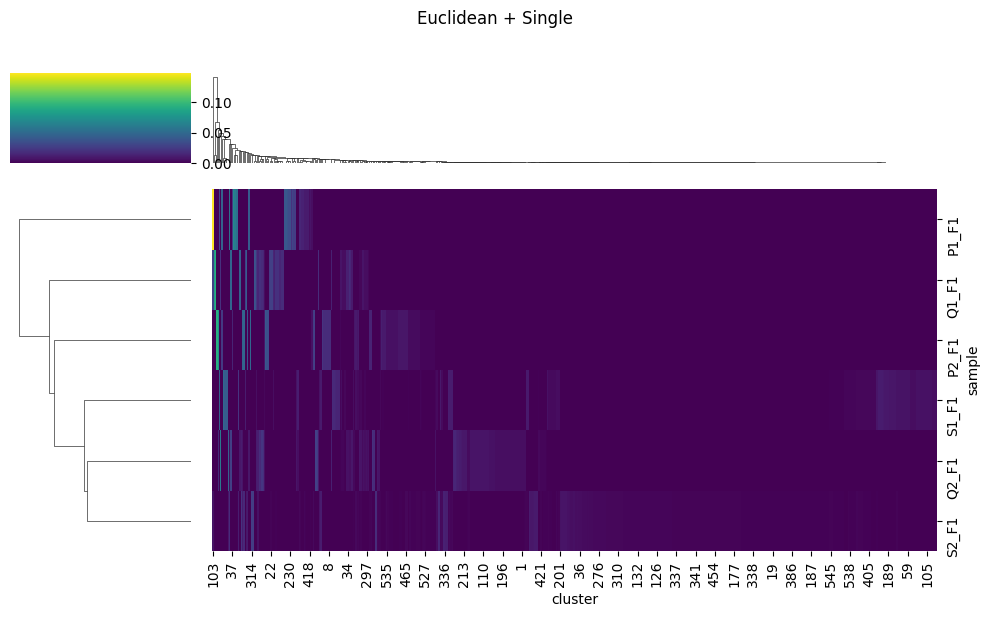

Метрика: euclidean, Метод: complete


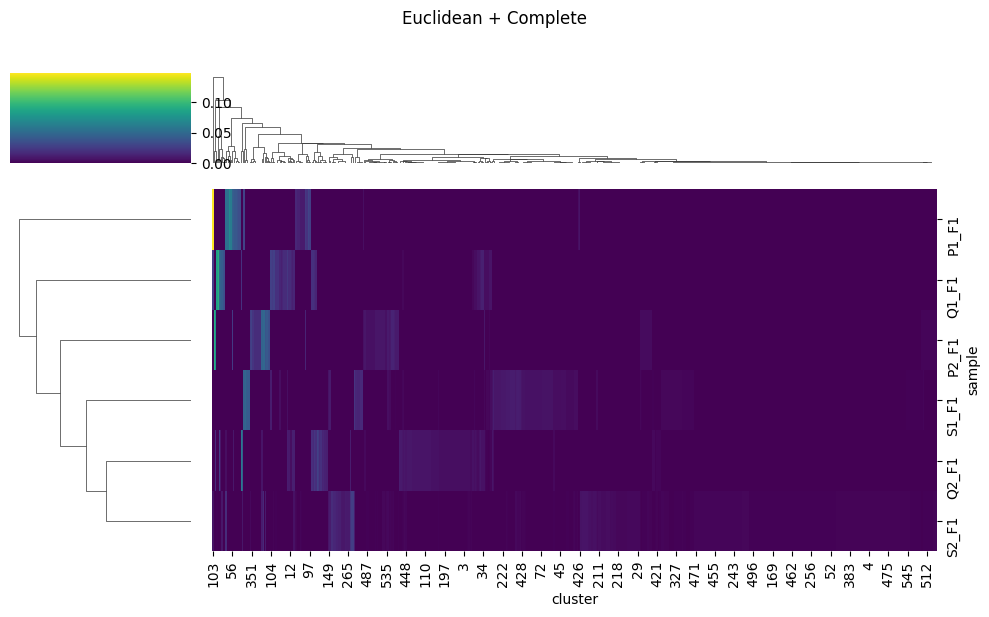

Метрика: euclidean, Метод: weighted


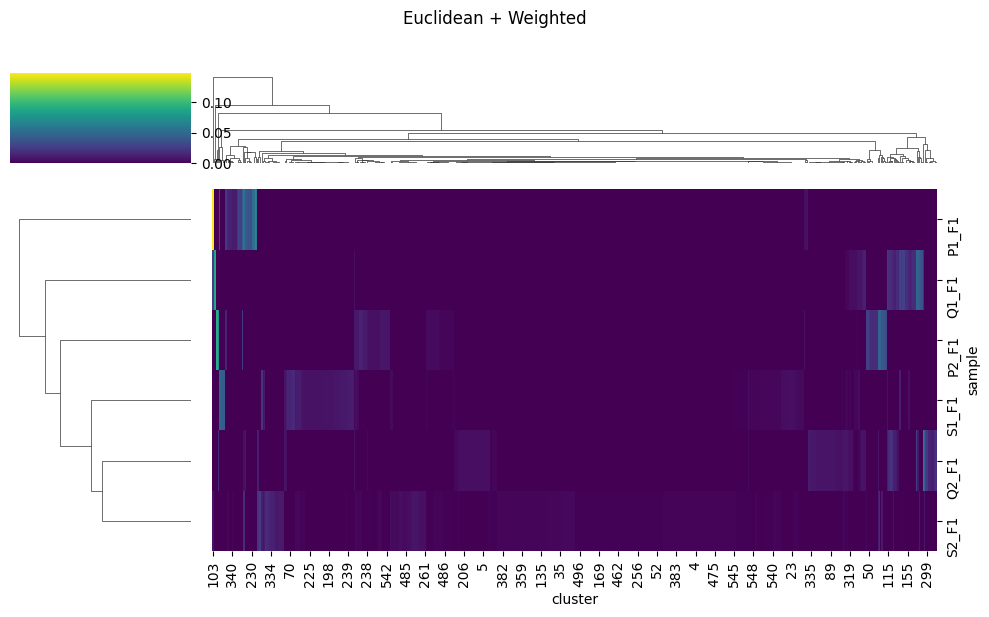

Метрика: euclidean, Метод: centroid


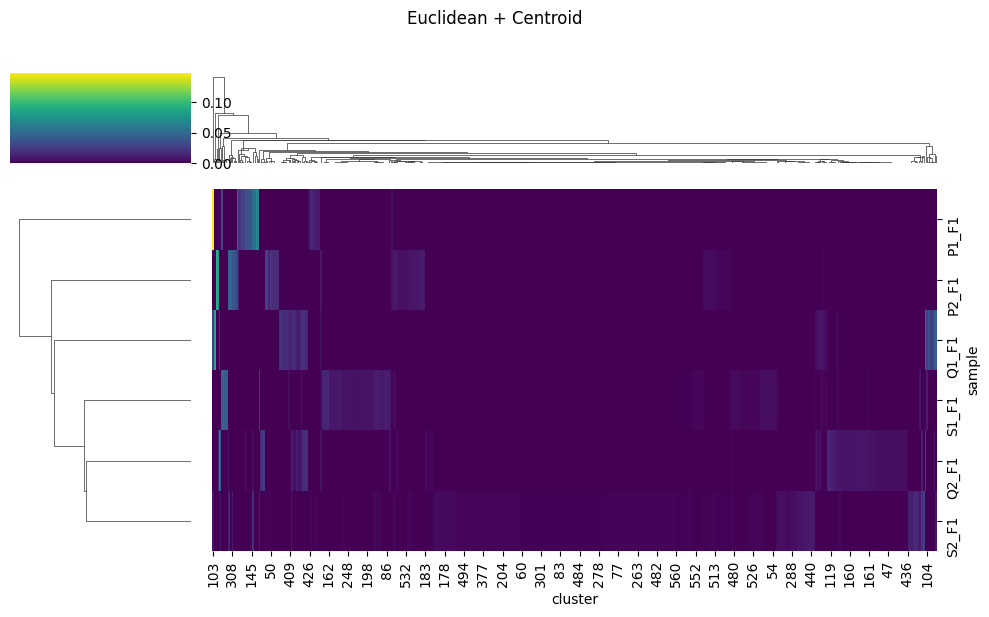

Метрика: cosine, Метод: average


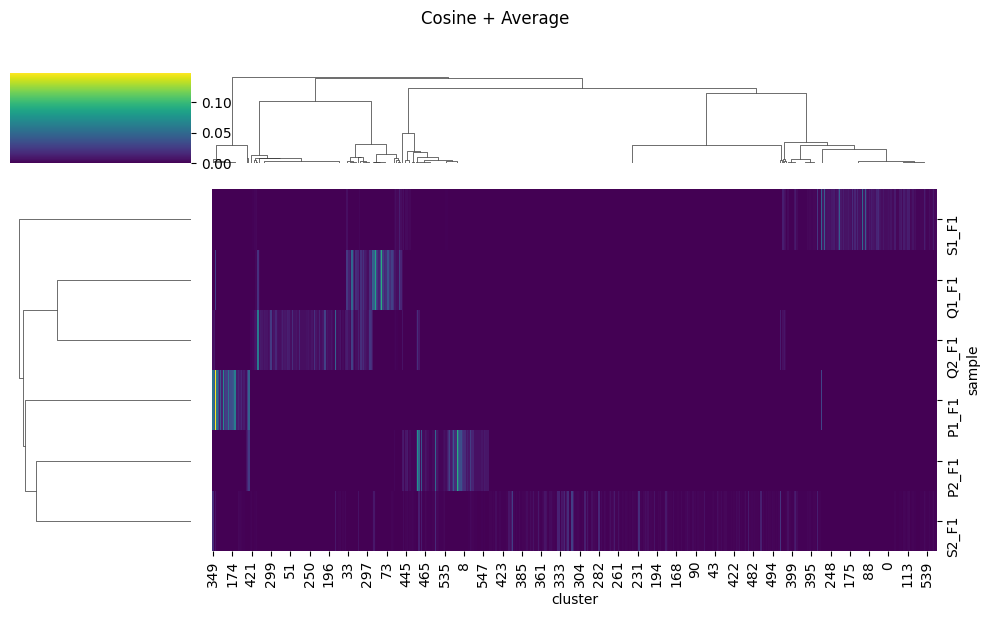

Метрика: cosine, Метод: single


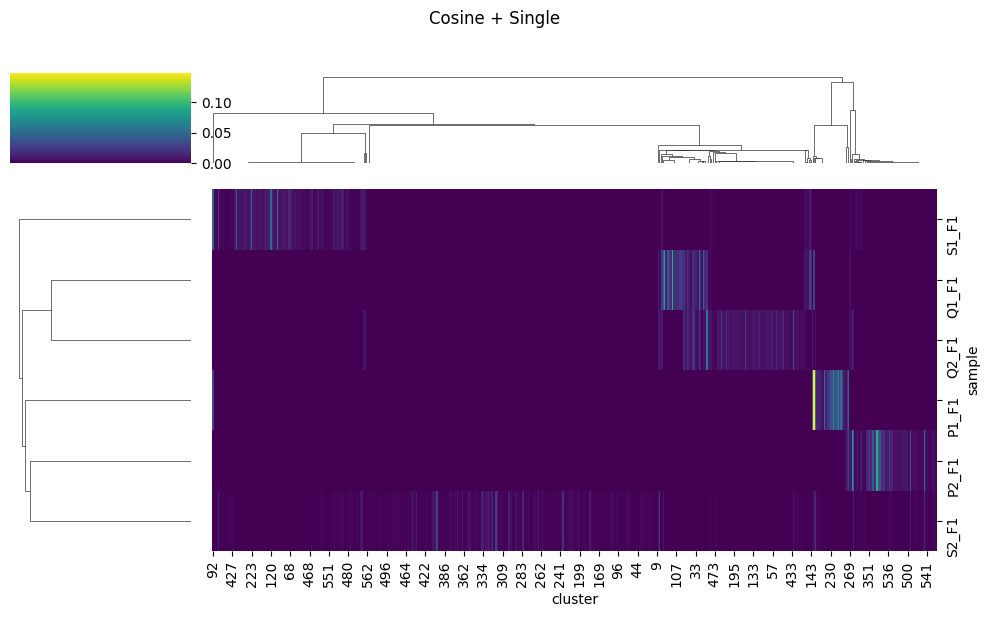

Метрика: cosine, Метод: complete


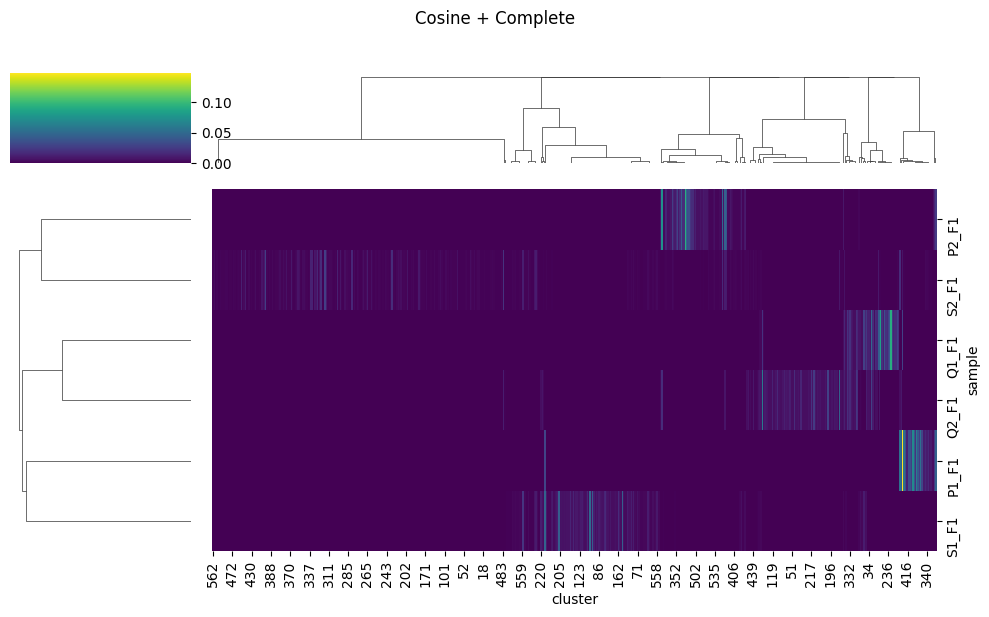

Метрика: cosine, Метод: weighted


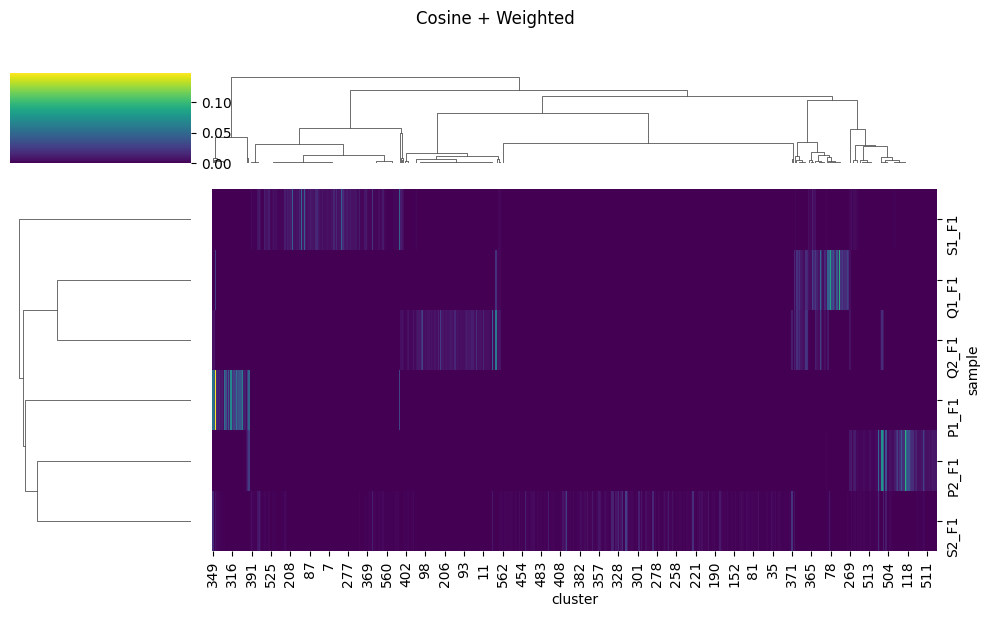

Метрика: cityblock, Метод: average


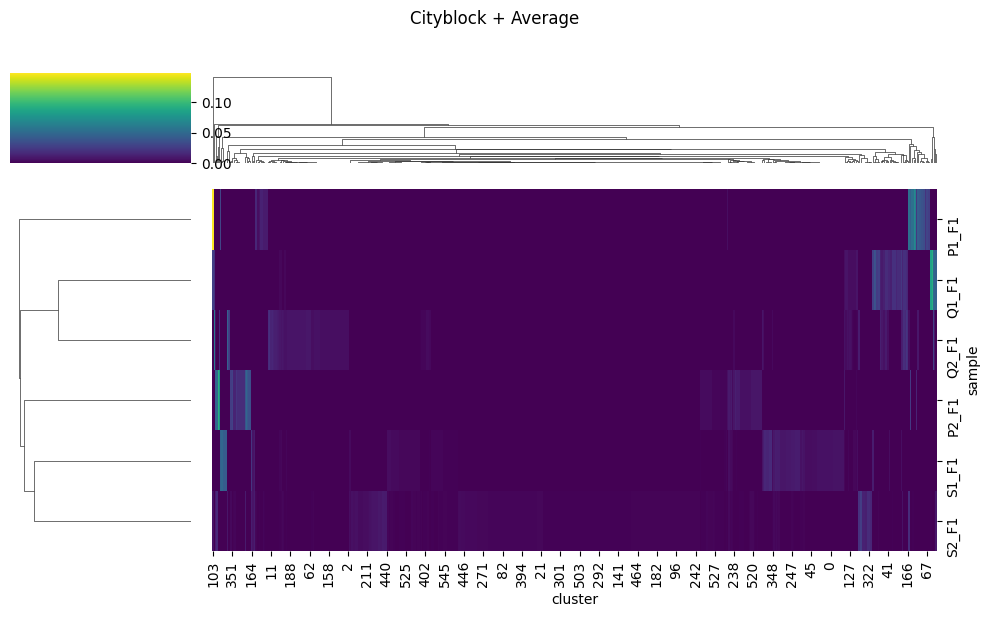

Метрика: cityblock, Метод: single


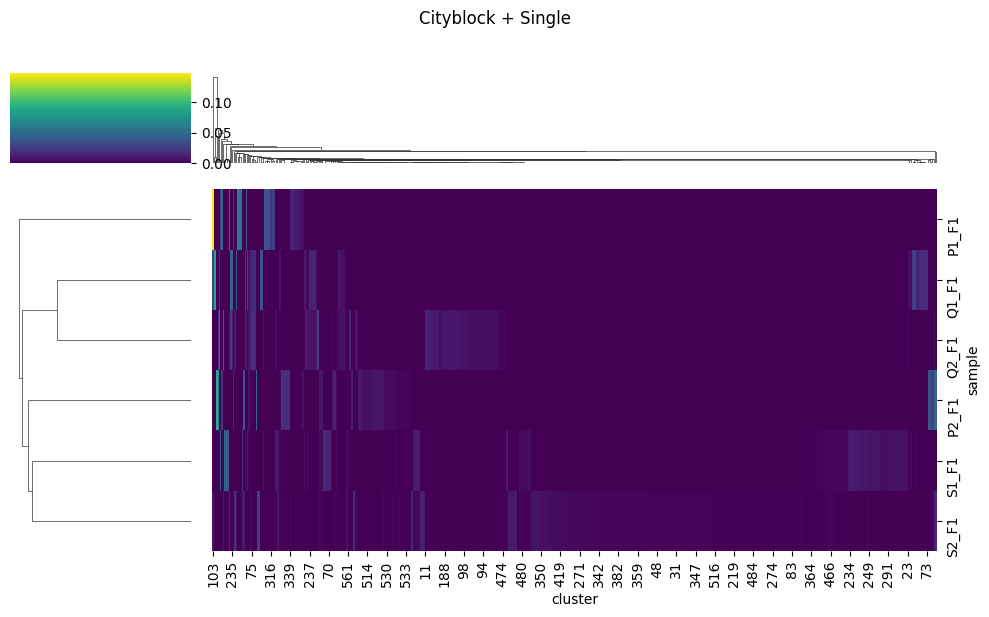

Метрика: cityblock, Метод: complete


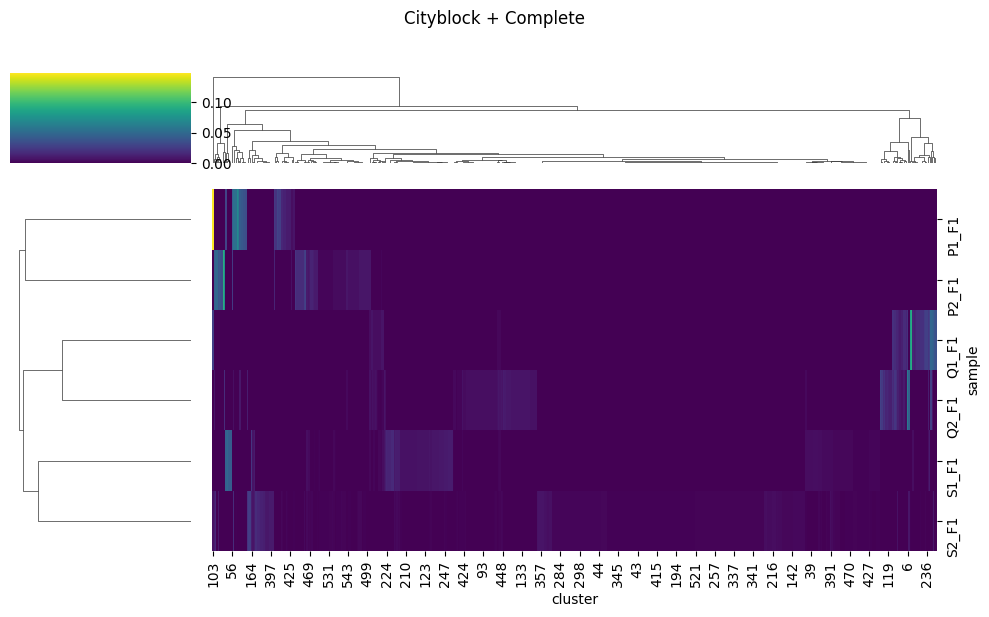

Метрика: cityblock, Метод: weighted


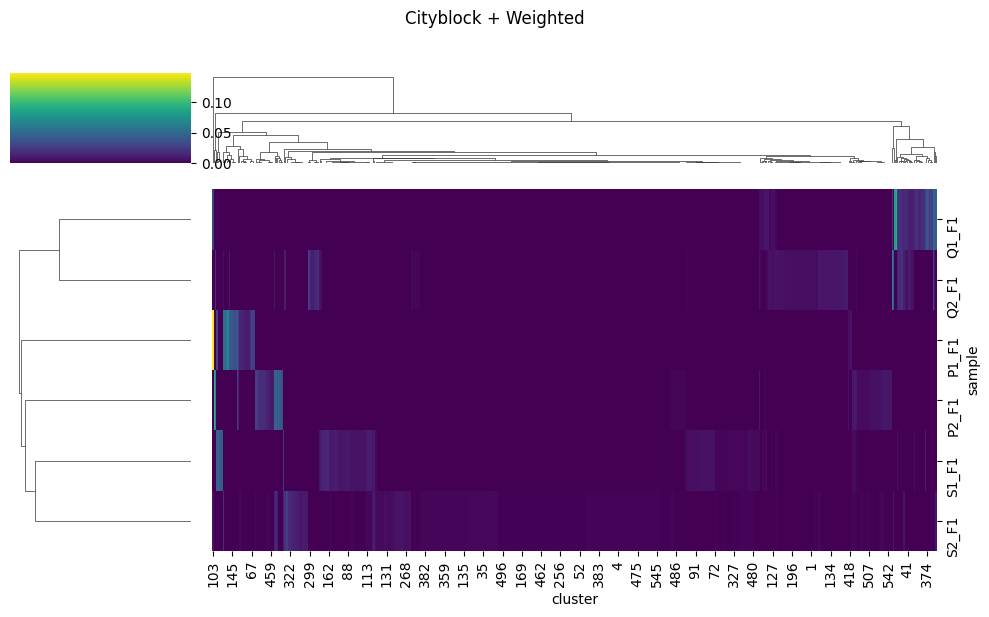

Метрика: correlation, Метод: average


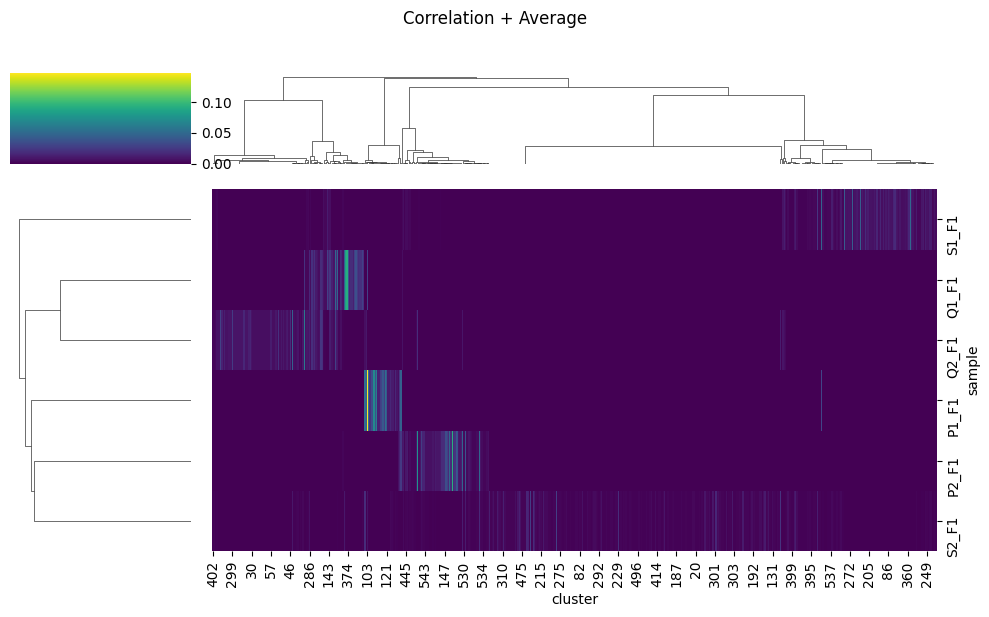

Метрика: correlation, Метод: single


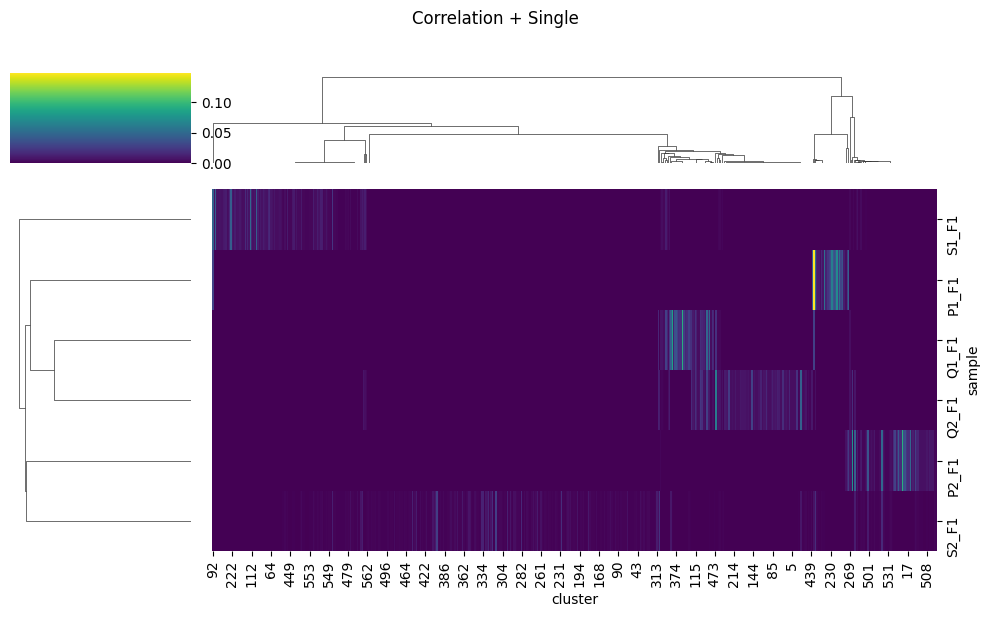

Метрика: correlation, Метод: complete


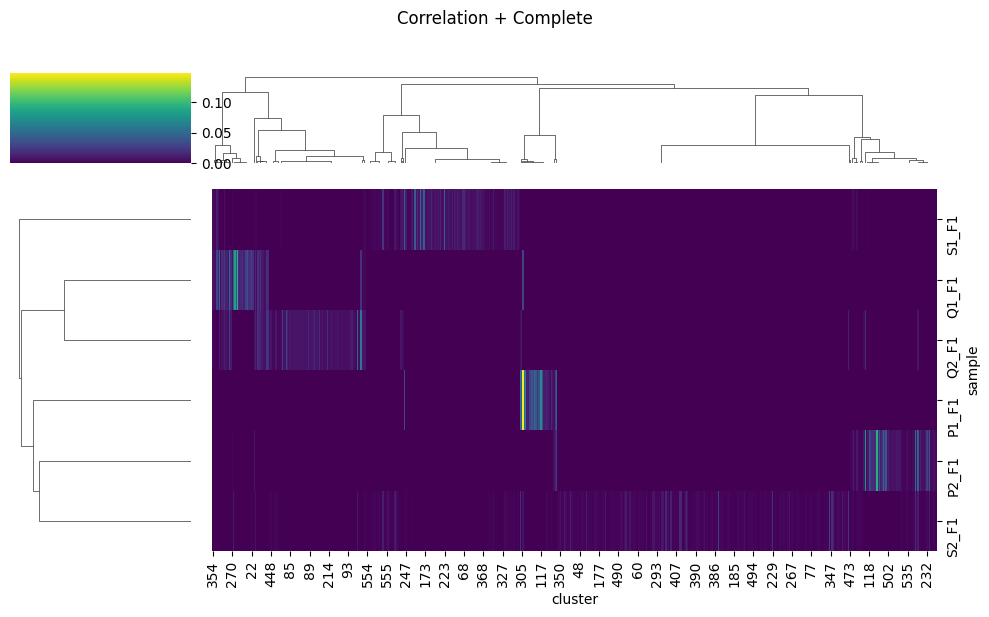

Метрика: correlation, Метод: weighted


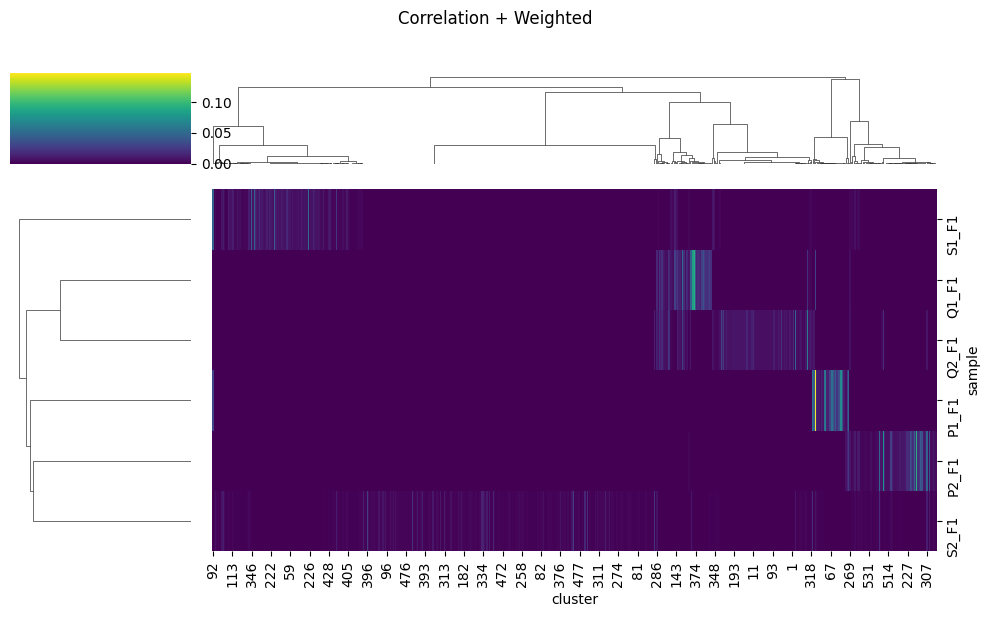

Метрика: chebyshev, Метод: average


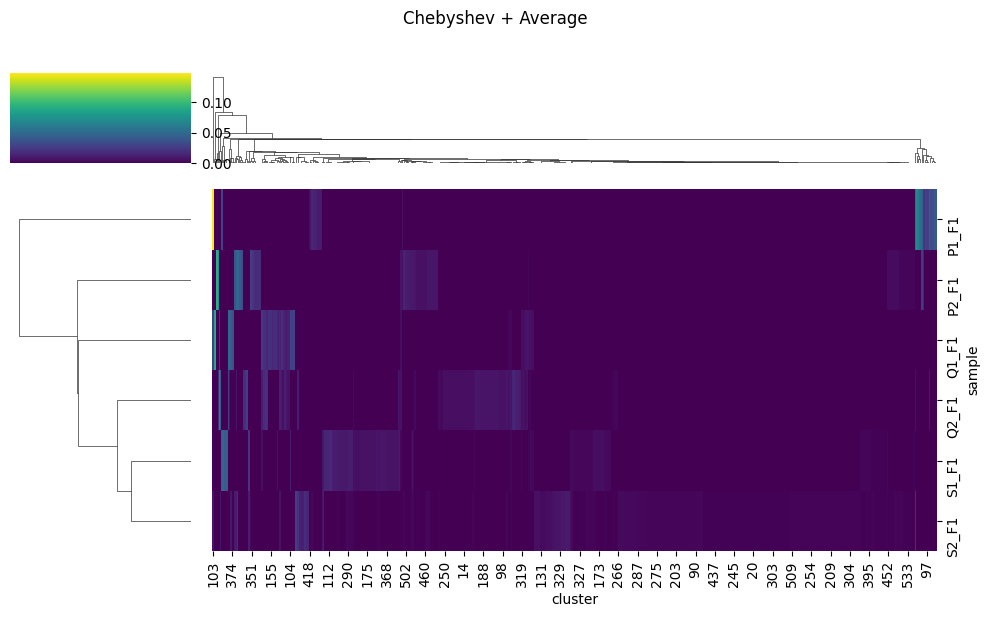

Метрика: chebyshev, Метод: single


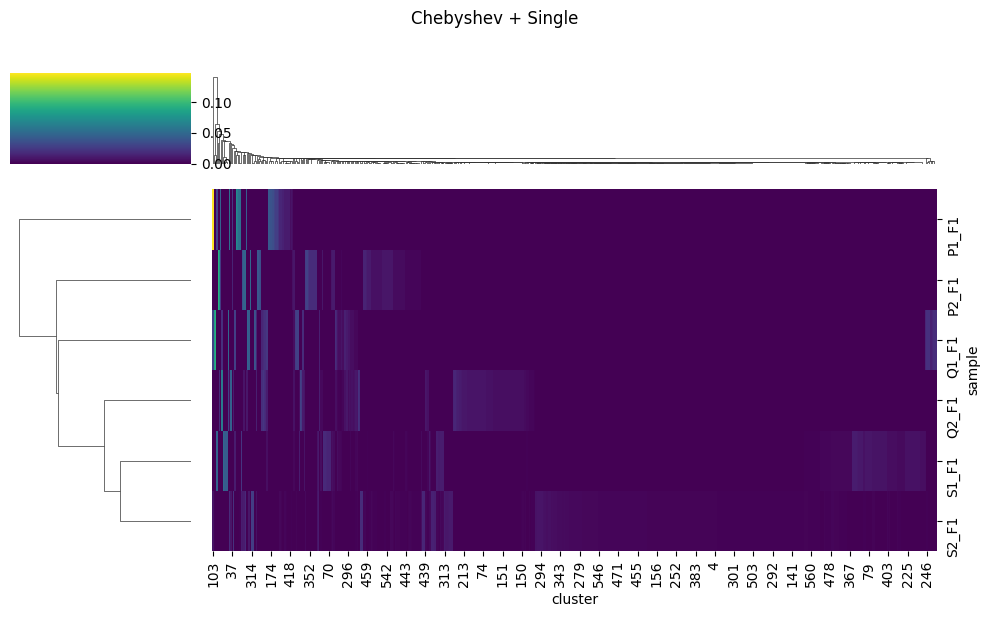

Метрика: chebyshev, Метод: complete


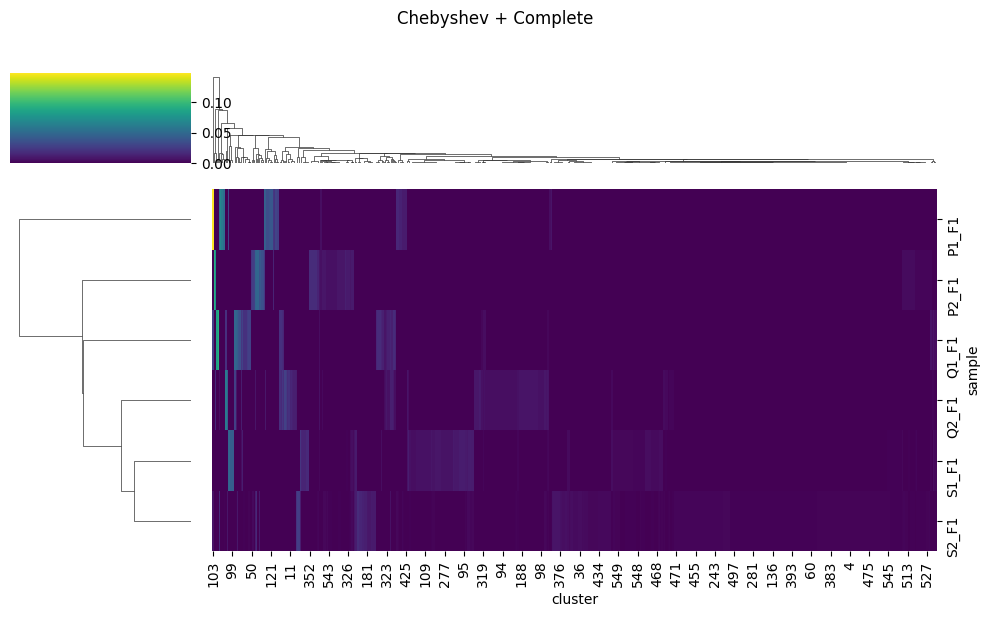

Метрика: chebyshev, Метод: weighted


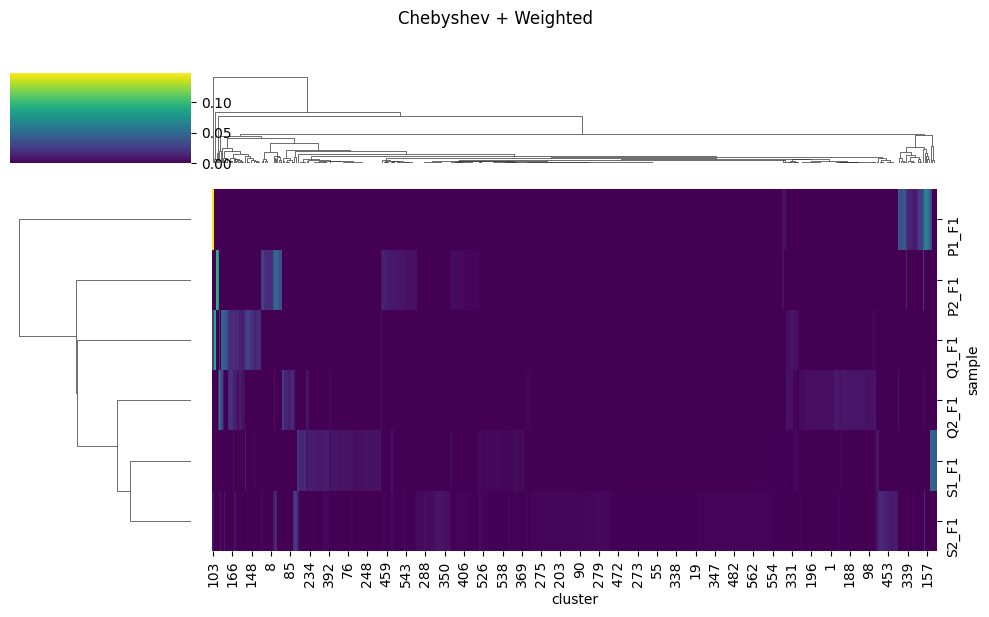

In [90]:
pivot_table = clustering.groupby(['sample', 'cluster']).size().unstack(fill_value=0).drop(columns=[-1])
pivot_table_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0)

metrics = ['euclidean', 'cosine', 'cityblock', 'correlation', 'chebyshev']
methods = ['average', 'ward', 'single', 'complete', 'weighted', 'centroid']

for metric in metrics:
    for method in methods:
        # Ward требует евклидову метрику
        if method == 'ward' or method == 'centroid' and metric != 'euclidean':
            continue
        
        print(f"Метрика: {metric}, Метод: {method}")
        g = sns.clustermap(
            pivot_table_normalized,
            metric=metric,
            method=method,
            cmap='viridis',
            figsize=(10, 6),
            # linewidths=0.1
        )
        g.fig.suptitle(f'{metric.capitalize()} + {method.capitalize()}', y=1.02)
        plt.tight_layout()
        plt.show()

In [94]:
pivot_table_bool = pivot_table_normalized.map(lambda x: 0 if x == 0 else 1)

Метрика: euclidean, Метод: average


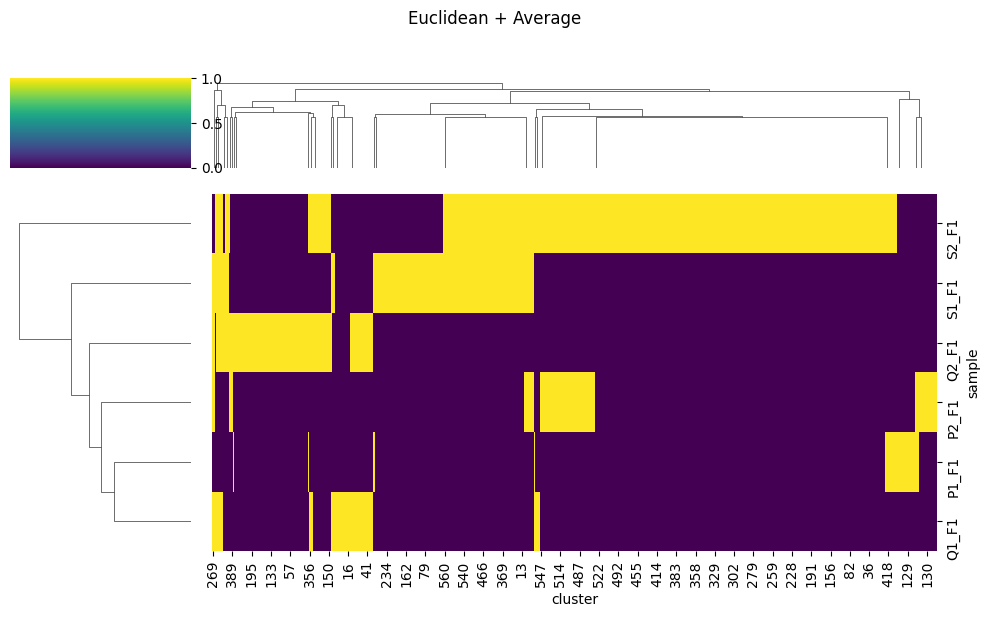

Метрика: euclidean, Метод: single


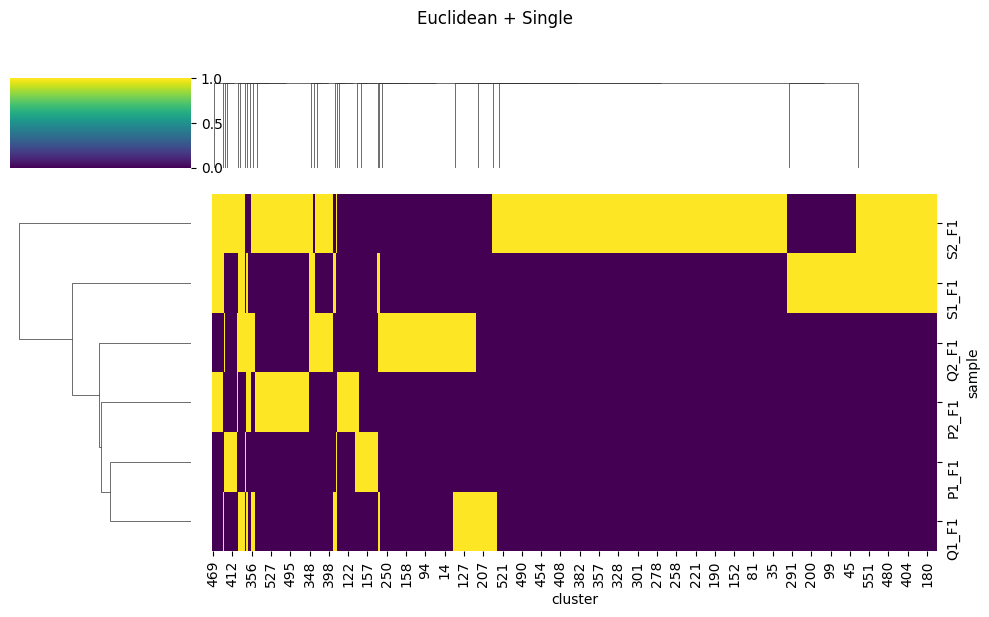

Метрика: euclidean, Метод: complete


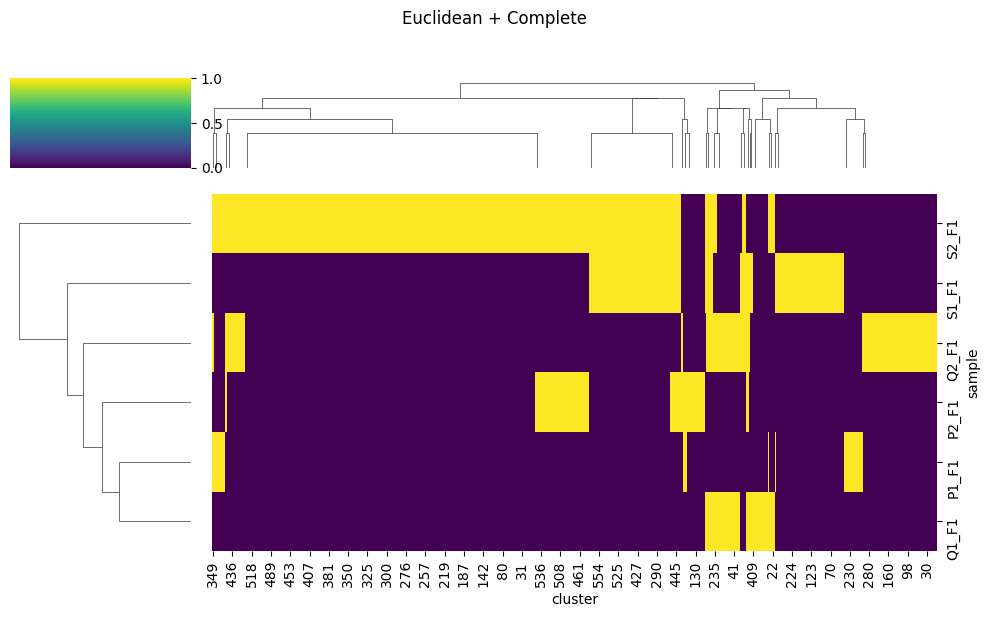

Метрика: euclidean, Метод: weighted


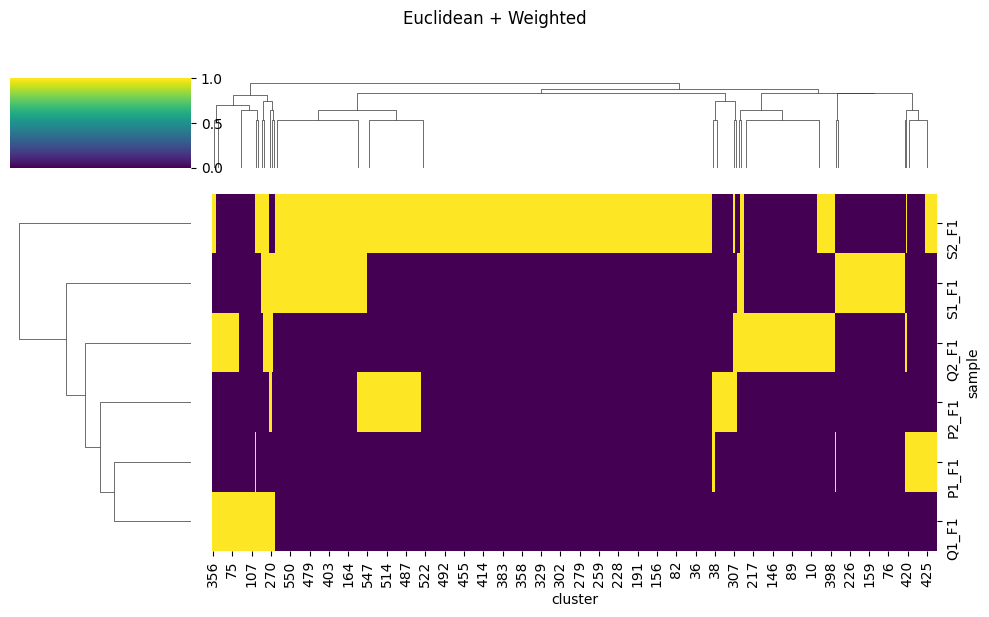

Метрика: euclidean, Метод: centroid


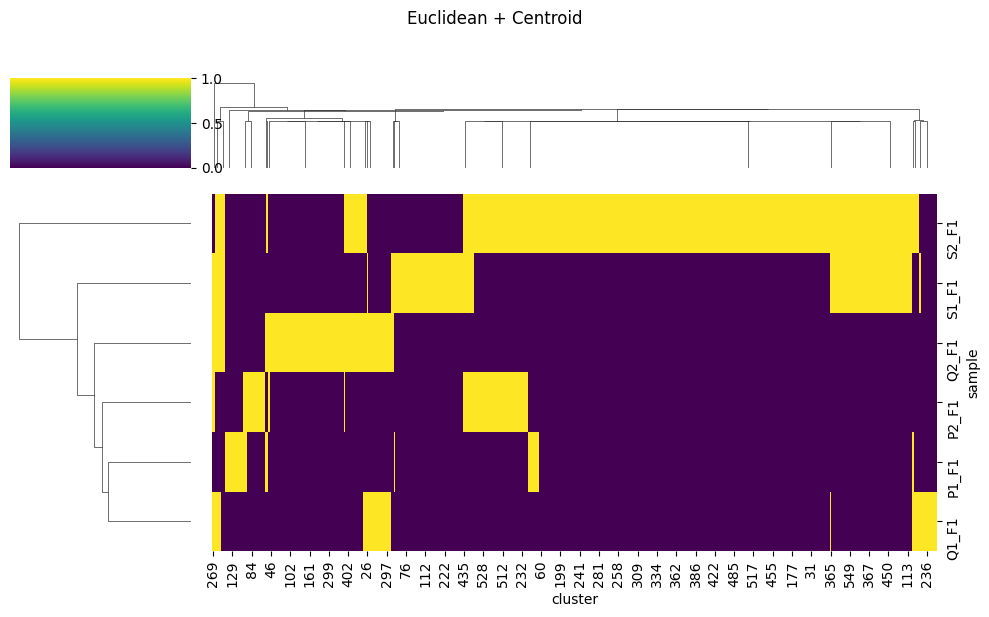

Метрика: cosine, Метод: average


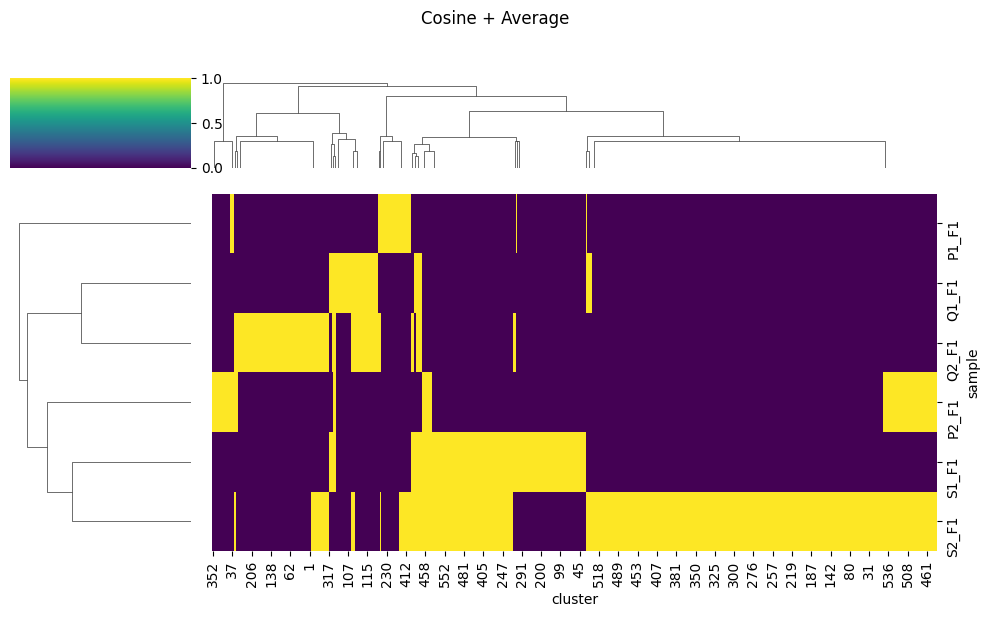

Метрика: cosine, Метод: single


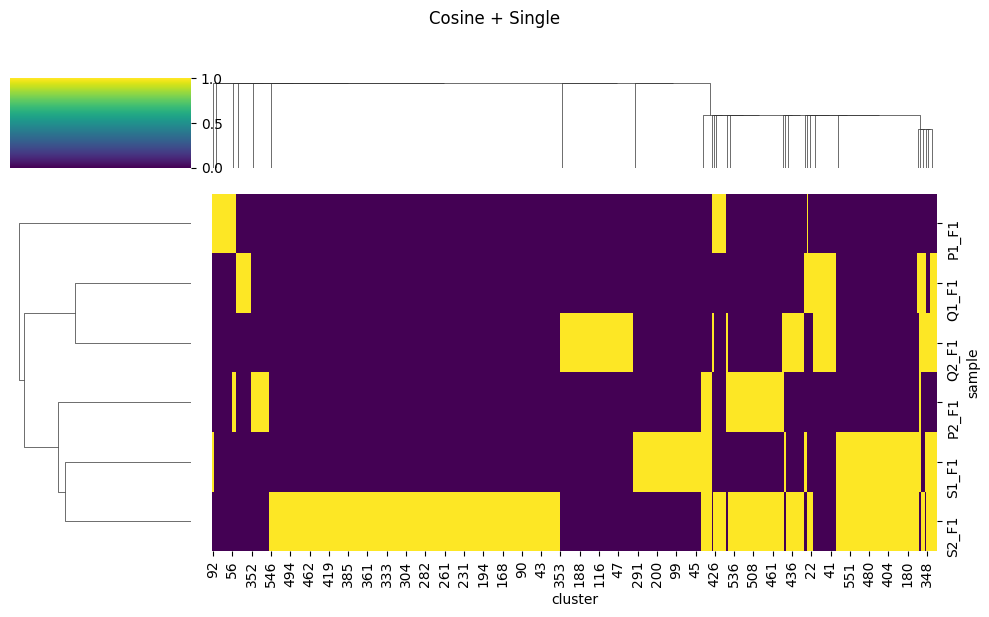

Метрика: cosine, Метод: complete


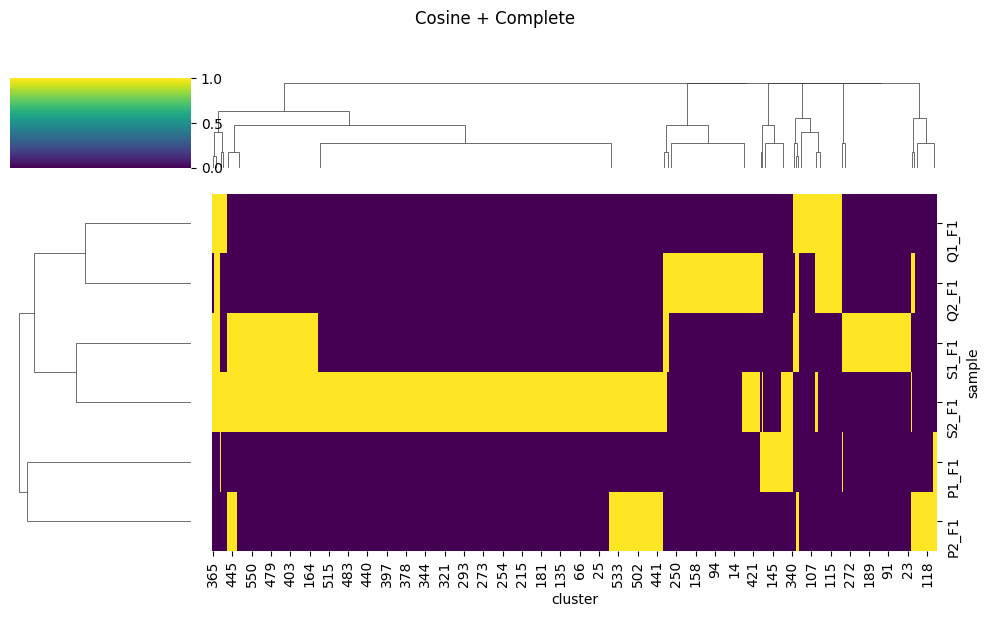

Метрика: cosine, Метод: weighted


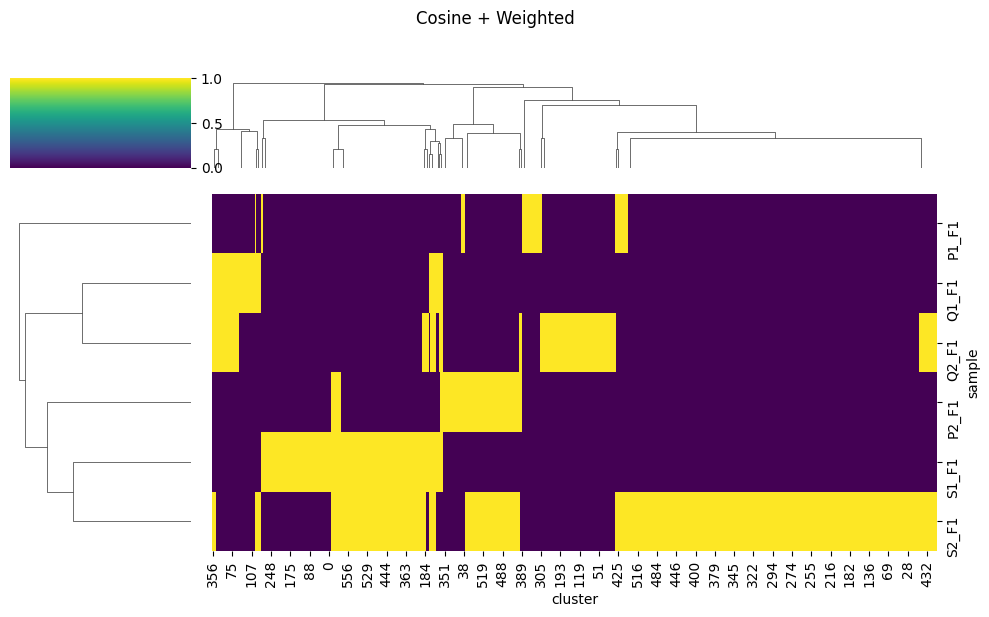

Метрика: cityblock, Метод: average


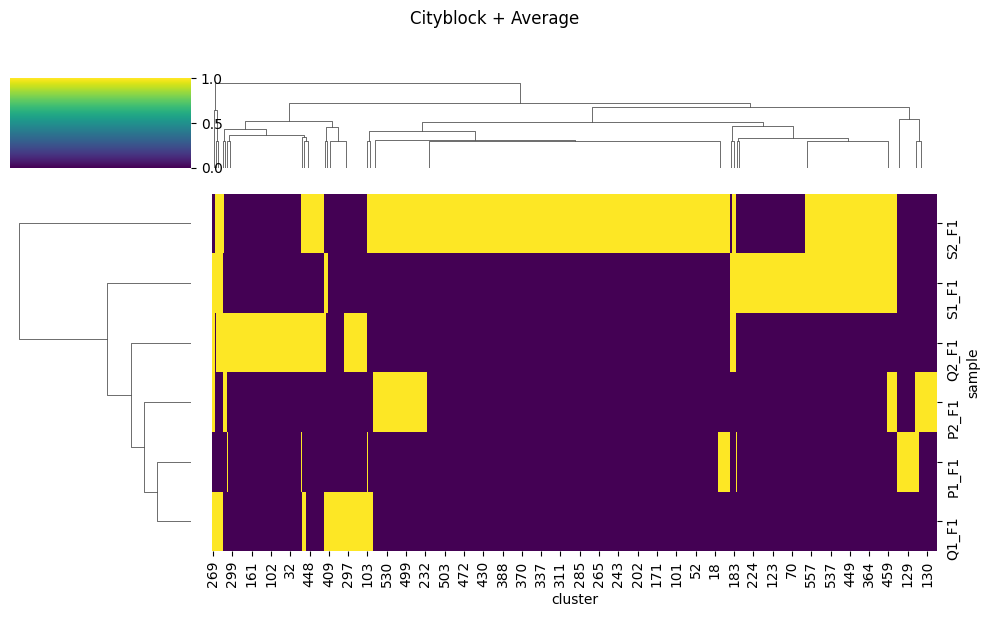

Метрика: cityblock, Метод: single


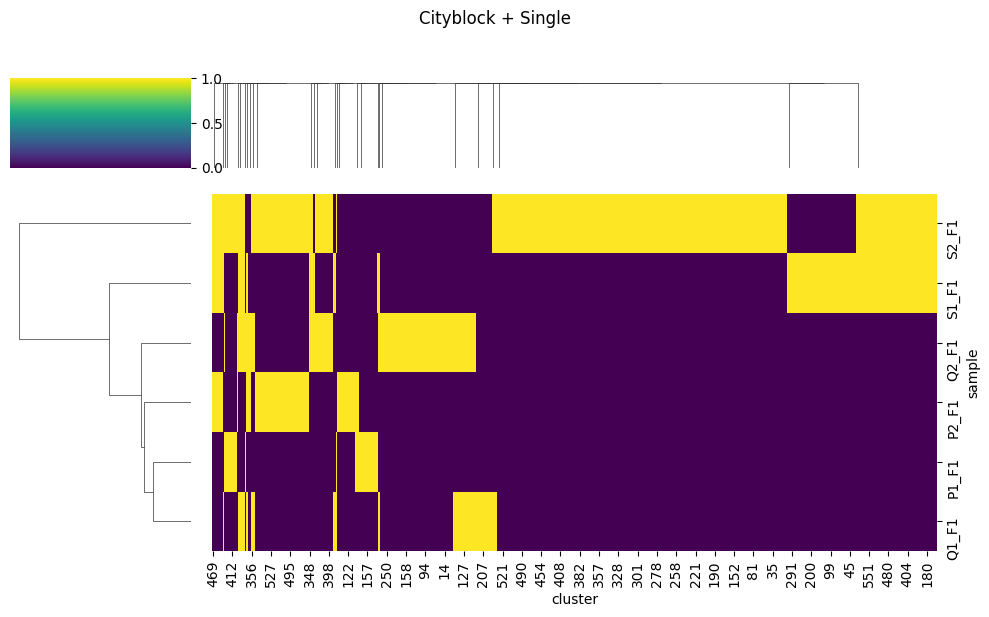

Метрика: cityblock, Метод: complete


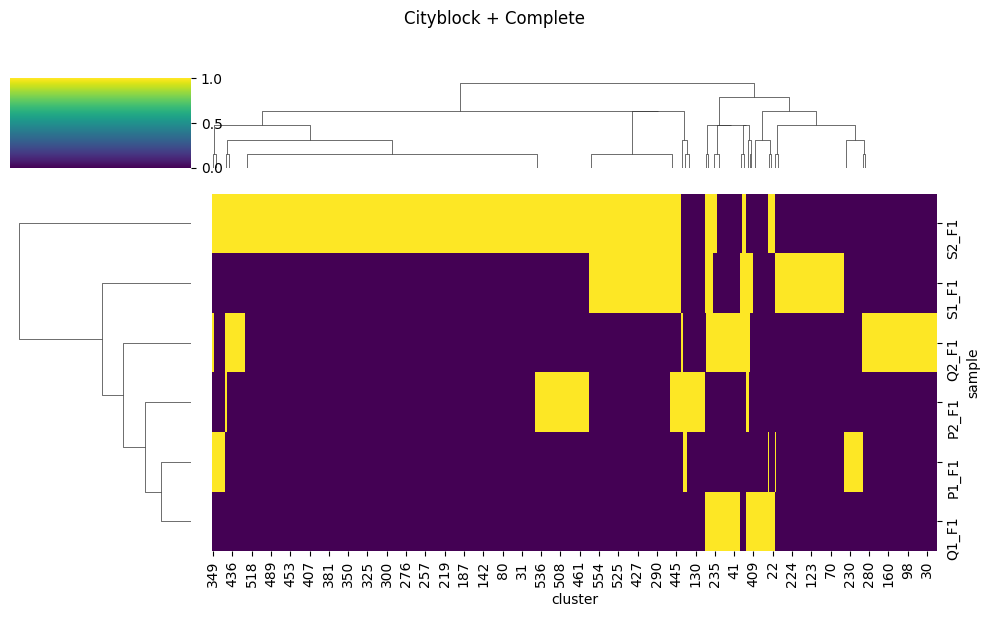

Метрика: cityblock, Метод: weighted


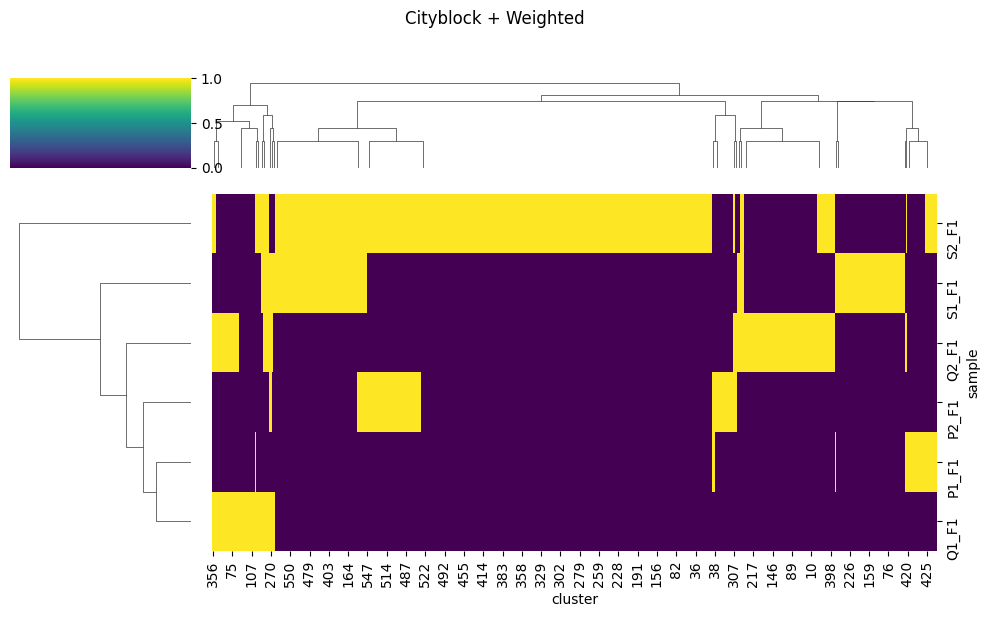

Метрика: correlation, Метод: average


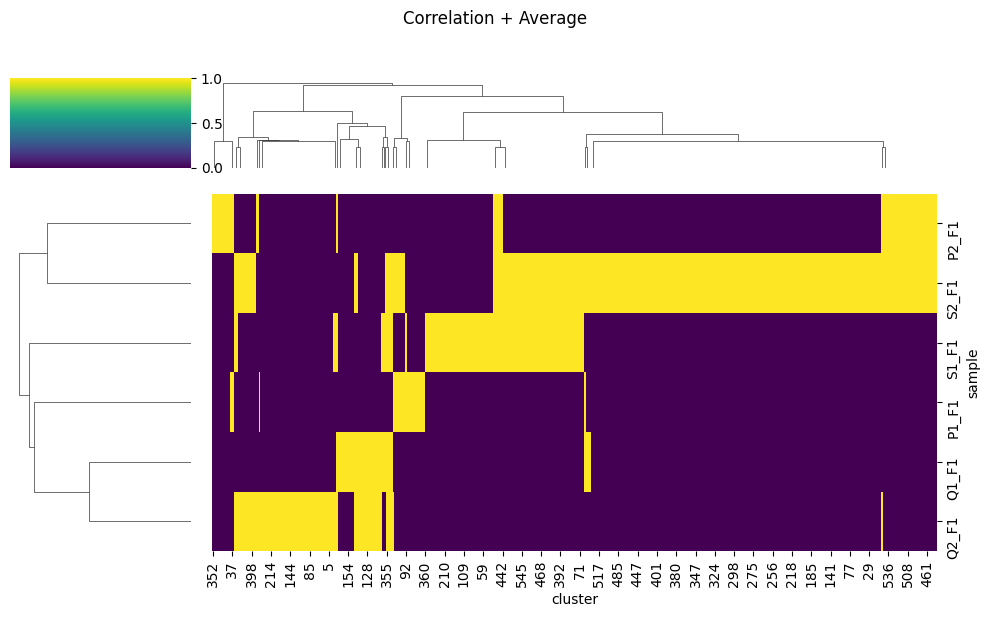

Метрика: correlation, Метод: single


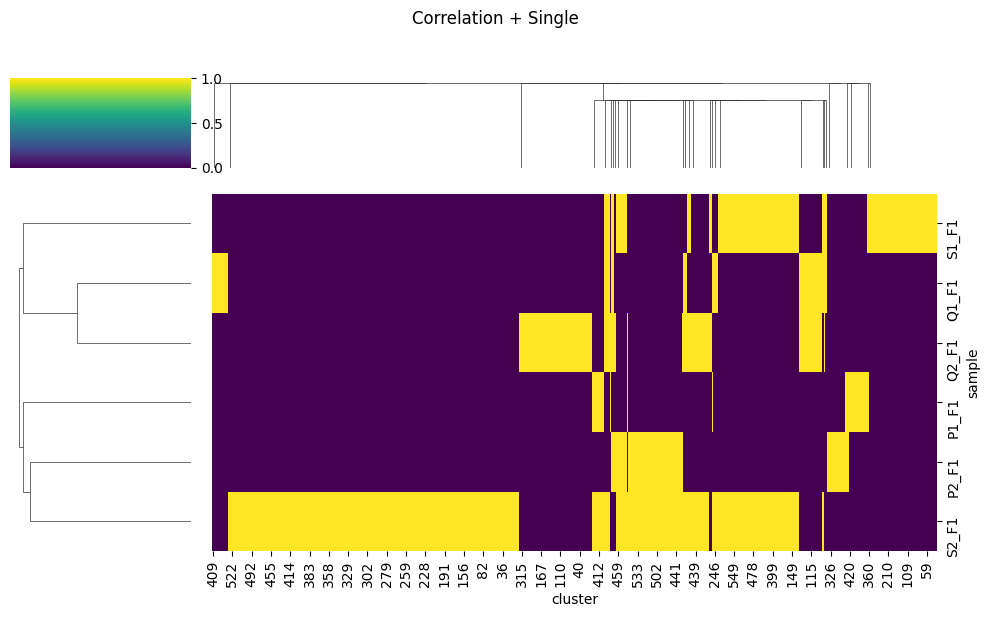

Метрика: correlation, Метод: complete


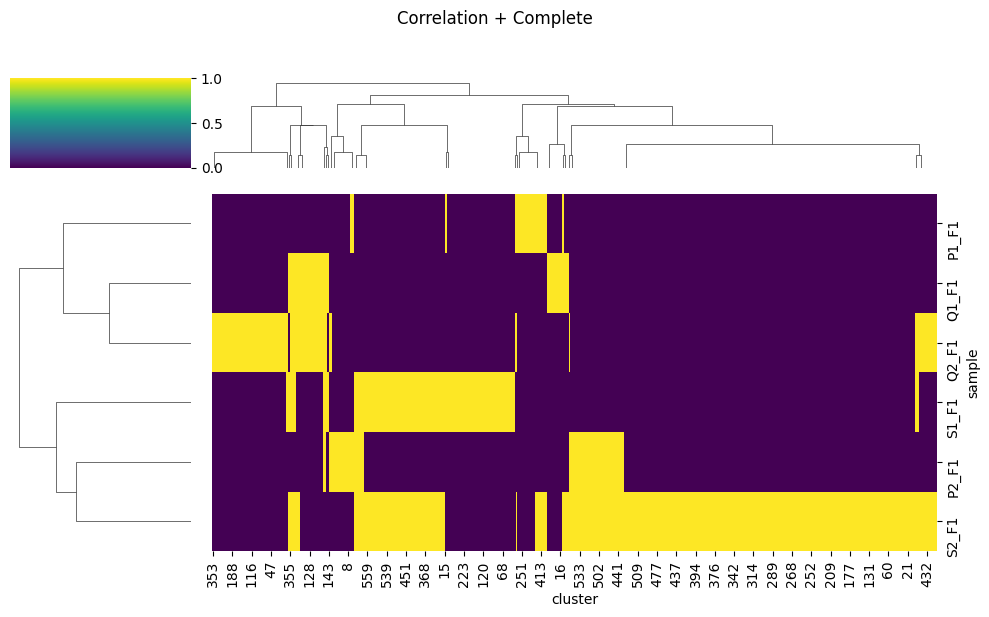

Метрика: correlation, Метод: weighted


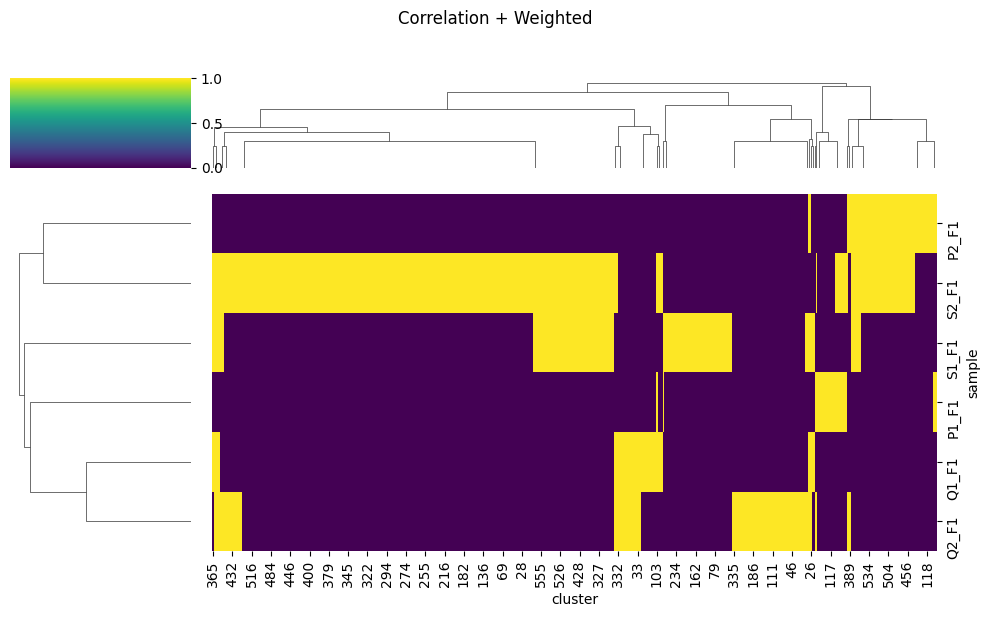

Метрика: chebyshev, Метод: average


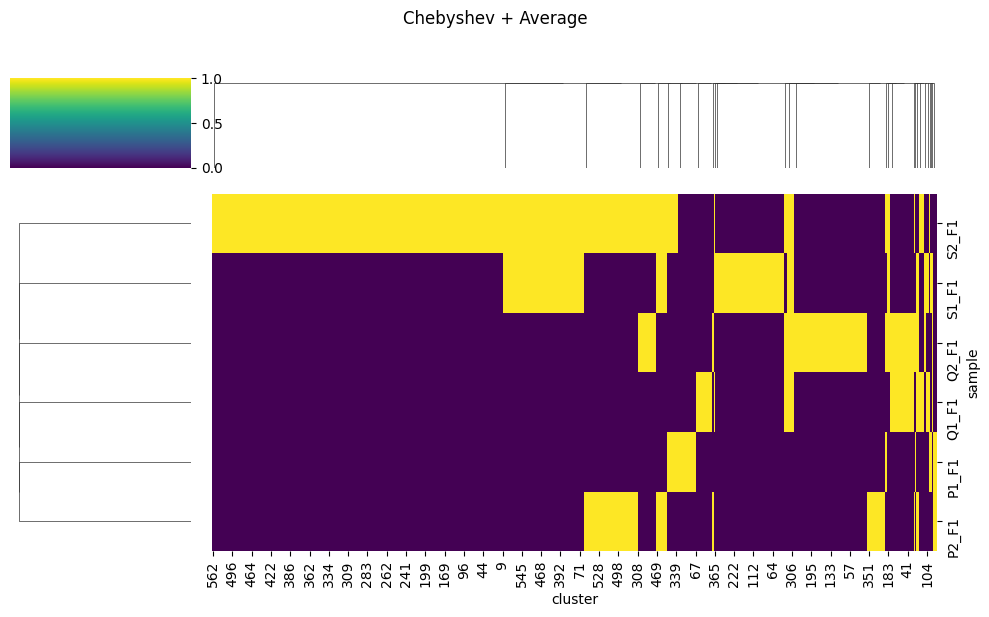

Метрика: chebyshev, Метод: single


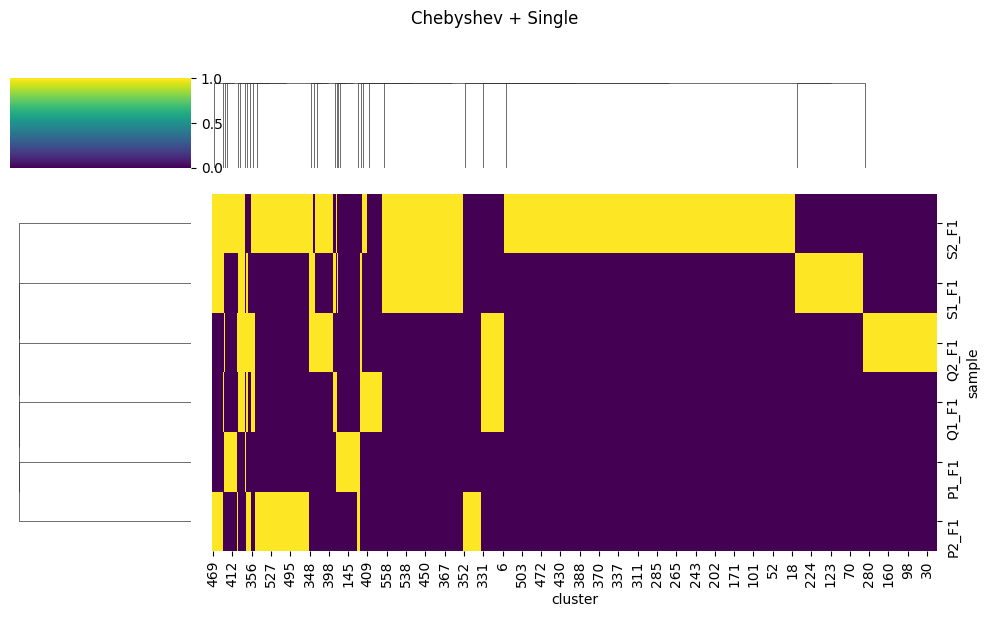

Метрика: chebyshev, Метод: complete


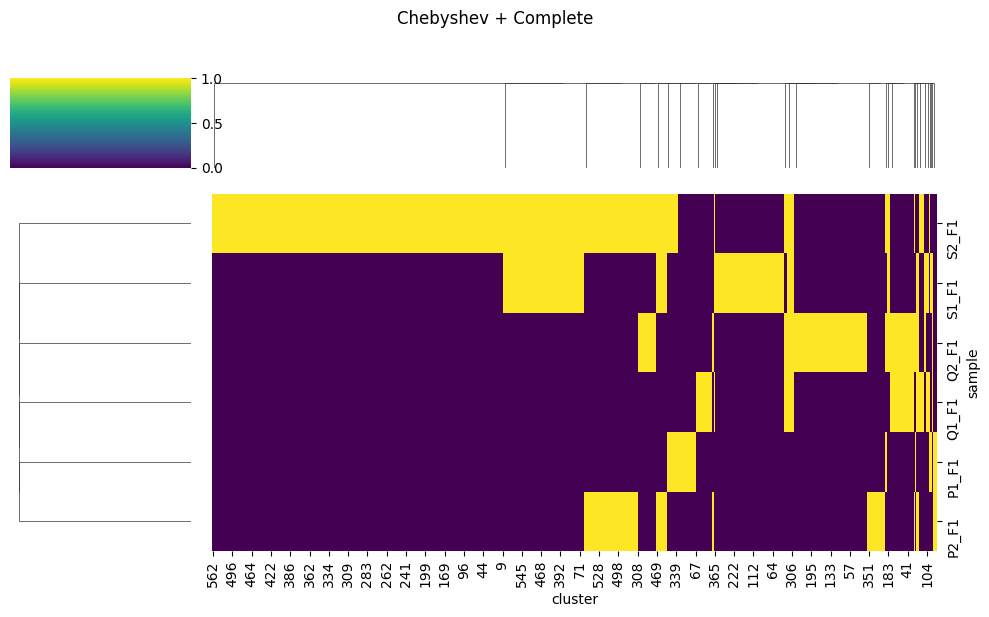

Метрика: chebyshev, Метод: weighted


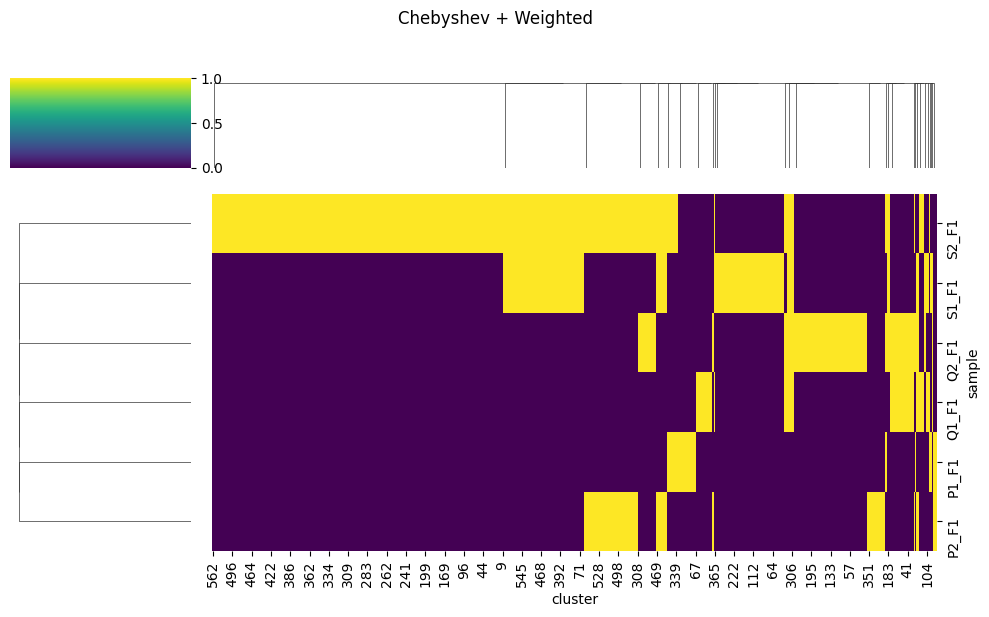

In [95]:
metrics = ['euclidean', 'cosine', 'cityblock', 'correlation', 'chebyshev']
methods = ['average', 'ward', 'single', 'complete', 'weighted', 'centroid']

for metric in metrics:
    for method in methods:
        # Ward требует евклидову метрику
        if method == 'ward' or method == 'centroid' and metric != 'euclidean':
            continue
        
        print(f"Метрика: {metric}, Метод: {method}")
        g = sns.clustermap(
            pivot_table_bool,
            metric=metric,
            method=method,
            cmap='viridis',
            figsize=(10, 6),
            # linewidths=0.1
        )
        g.fig.suptitle(f'{metric.capitalize()} + {method.capitalize()}', y=1.02)
        plt.tight_layout()
        plt.show()